In [1]:
# import datajoint as dj
# import numpy as np
# from pipeline import meso,reso,experiment,fuse
# from stimline import tune
# from pipeline.utils.galvo_corrections import correct_raster, correct_motion
# from scipy.ndimage import gaussian_filter
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from tqdm import tqdm
# import scanreader
# from tifffile import imsave
# from sklearn.decomposition import NMF
# from scipy.ndimage import convolve1d
# import cv2


# def normalize_signal(signal, offset=0):
#     signal = signal - np.nanmean(signal)
#     signal = signal / (np.nanmax(signal) - np.nanmin(signal))
#     signal = signal - np.nanmin(signal) + offset
#     return signal


# Importing the DSP Utils

In [2]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty/")

import dsp_utils as dspu

In [3]:
def hamming_filter_sequence_old(source_hz, target_hz):
    hamming_width = 2*np.floor(source_hz/target_hz) + 1
    hamming = np.hamming(hamming_width)/sum(np.hamming(hamming_width))
    return hamming

In [4]:
def hamming_filter(movie, time_axis, source_times, target_times, filter_size=20):
    source_hz = 1/np.median(np.diff(source_times))
    target_hz = 1/np.median(np.diff(target_times))
    scipy_ham = signal.firwin(filter_size, cutoff=target_hz/2, window="hamming", fs=source_hz)
    filtered_movie = convolve1d(movie, scipy_ham, axis=time_axis)
    return filtered_movie

In [33]:
from scipy import signal
def hamming_filter_cameron(source_hz, target_hz, filter_size=20):
    scipy_ham = signal.firwin(filter_size, cutoff=target_hz/2, window="hamming", fs=source_hz)
    return scipy_ham
#     filtered_movie = convolve1d(movie, scipy_ham, axis=time_axis)
#     return filtered_movie

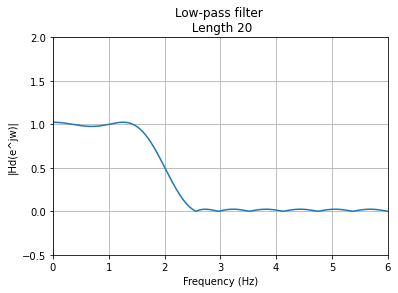

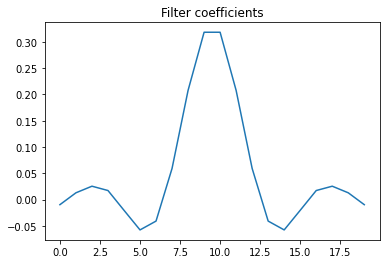

array([-0.00969967,  0.01289257,  0.02544153,  0.01721343, -0.02038753,
       -0.05770284, -0.0409099 ,  0.05925333,  0.20762995,  0.318257  ,
        0.318257  ,  0.20762995,  0.05925333, -0.0409099 , -0.05770284,
       -0.02038753,  0.01721343,  0.02544153,  0.01289257, -0.00969967])

# Cameron Low pass filter

In [34]:
fps = 12.749
lowpass_freq = 2

In [35]:
fps = 10
lowpass_freq = 9.9

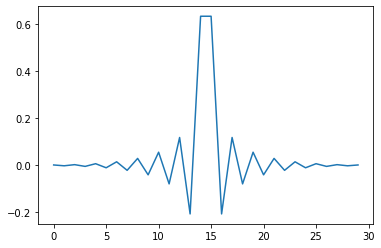

In [51]:
import matplotlib.pyplot as plt
plt.plot(ham_filt)

[ 0.00157472 -0.00194732  0.00287798 -0.0044932   0.00693604 -0.01037745
  0.01503738 -0.02122517  0.02941886 -0.0404328   0.05580948 -0.07888317
  0.11839417 -0.20655388  0.63386433  0.63386433 -0.20655388  0.11839417
 -0.07888317  0.05580948 -0.0404328   0.02941886 -0.02122517  0.01503738
 -0.01037745  0.00693604 -0.0044932   0.00287798 -0.00194732  0.00157472]


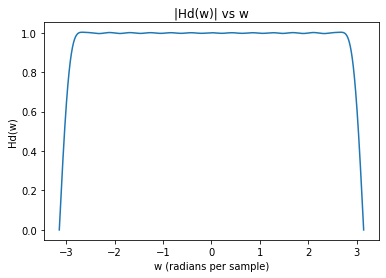

In [50]:
ham_filt = hamming_filter_cameron( fps, lowpass_freq,filter_size=30)
print(ham_filt)
dspu.sequence_to_plot_Hdw_magnitude(ham_filt)

In [ ]:
len(scipy_ham)

In [ ]:
from scipy import signal
n = len(ham_filt)
scipy_ham = signal.firwin(n, cutoff = 2, window = "hamming",fs=fps)
dspu.sequence_to_plot_Hdw_magnitude(scipy_ham,dB = False)

In [ ]:
parks_filter = dspu.parks_mcclellan_specs_to_filter(20,1.90,2.1,sampling_freq=fps,plot_magnitude=False, plot_dB = False)
dspu.sequence_to_plot_Hdw_magnitude(parks_filter,dB = False)

In [ ]:
from pipeline import shared

# testing the attenutation
fz = 1.5
t = np.arange(0,10,1/fps)
x = np.cos(2*np.pi*fz*t)

plt.plot(x,label = f"Cosine {fz} Hz")
plt.plot(np.convolve(x,parks_filter,mode="same"),label='parks-mcclellan')
plt.plot(np.convolve(x,ham_filt,mode="same"),label='hamming')
plt.plot(shared.FilterMethod._lowpass_hamming(x, fps, 2),label="shared_lowpass")
plt.plot(np.convolve(x,scipy_ham,mode="same"),label="scipy hamming")
plt.legend()